<a href="https://colab.research.google.com/github/therohitk1/Gold_Price_Prediction_Machine_Learning.ipynb/blob/main/Gold_Price_Prediction_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
#load the data
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
print(df.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [ ]:
df = pd.read_csv('gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099


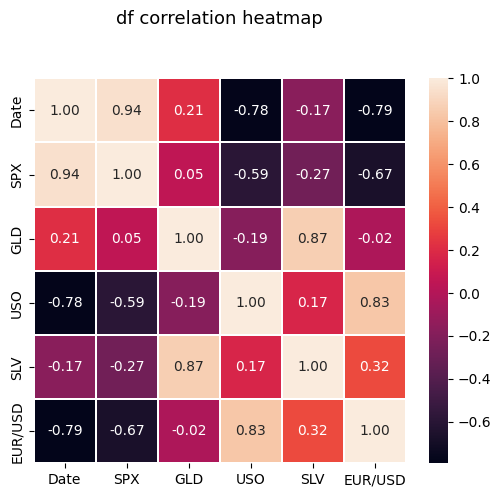

GLD        1.000000
SLV        0.866632
Date       0.209118
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



In [ ]:
corr = df.corr() #Correlations matrix and heatmap
plt.figure(figsize = (6,5))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, annot = True, fmt = '.2f', linewidths = 0.30)
plt.title('df correlation heatmap', y = 1.12, size = 13, loc = "center")
plt.show()

#Print the correlation score also.
print(corr['GLD'].sort_values(ascending = False), '\n')

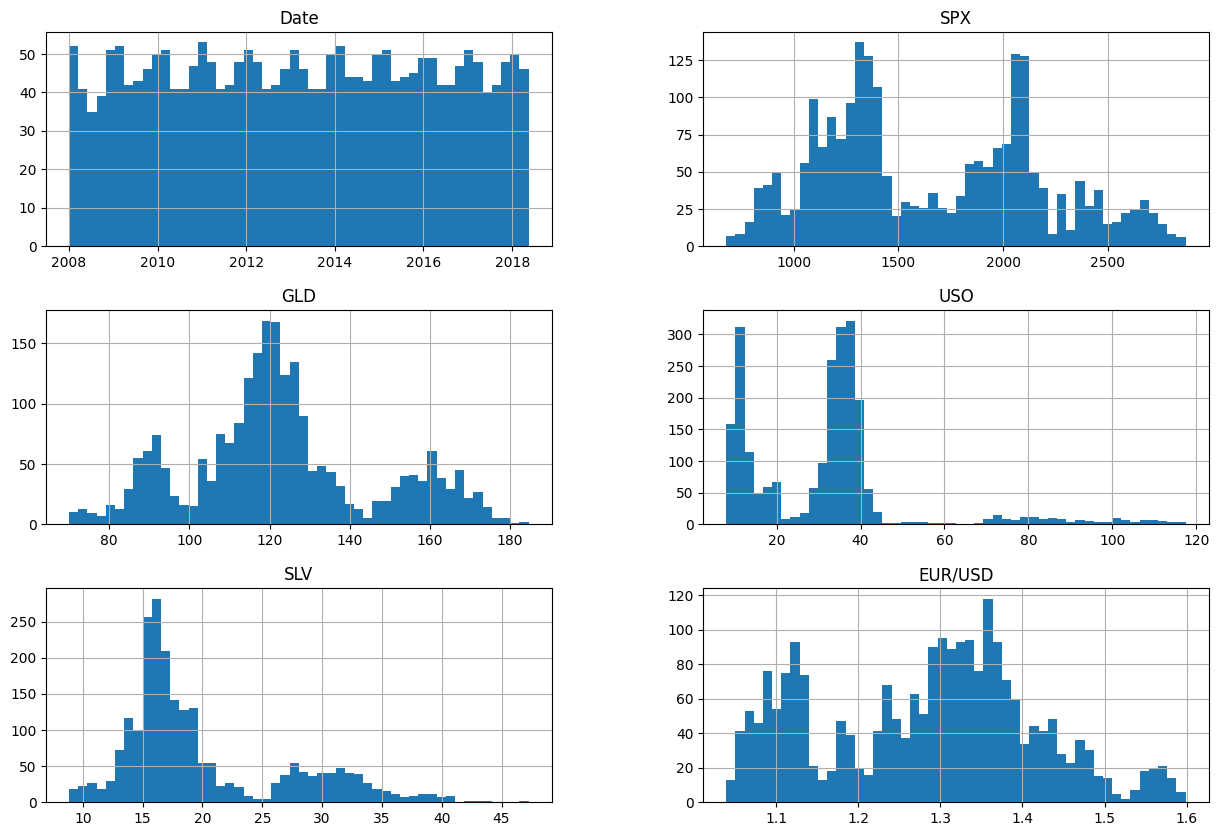

In [ ]:
# Predict the GLD variable value based on other variables
df.hist(bins = 50, figsize = (15,10))
plt.show()


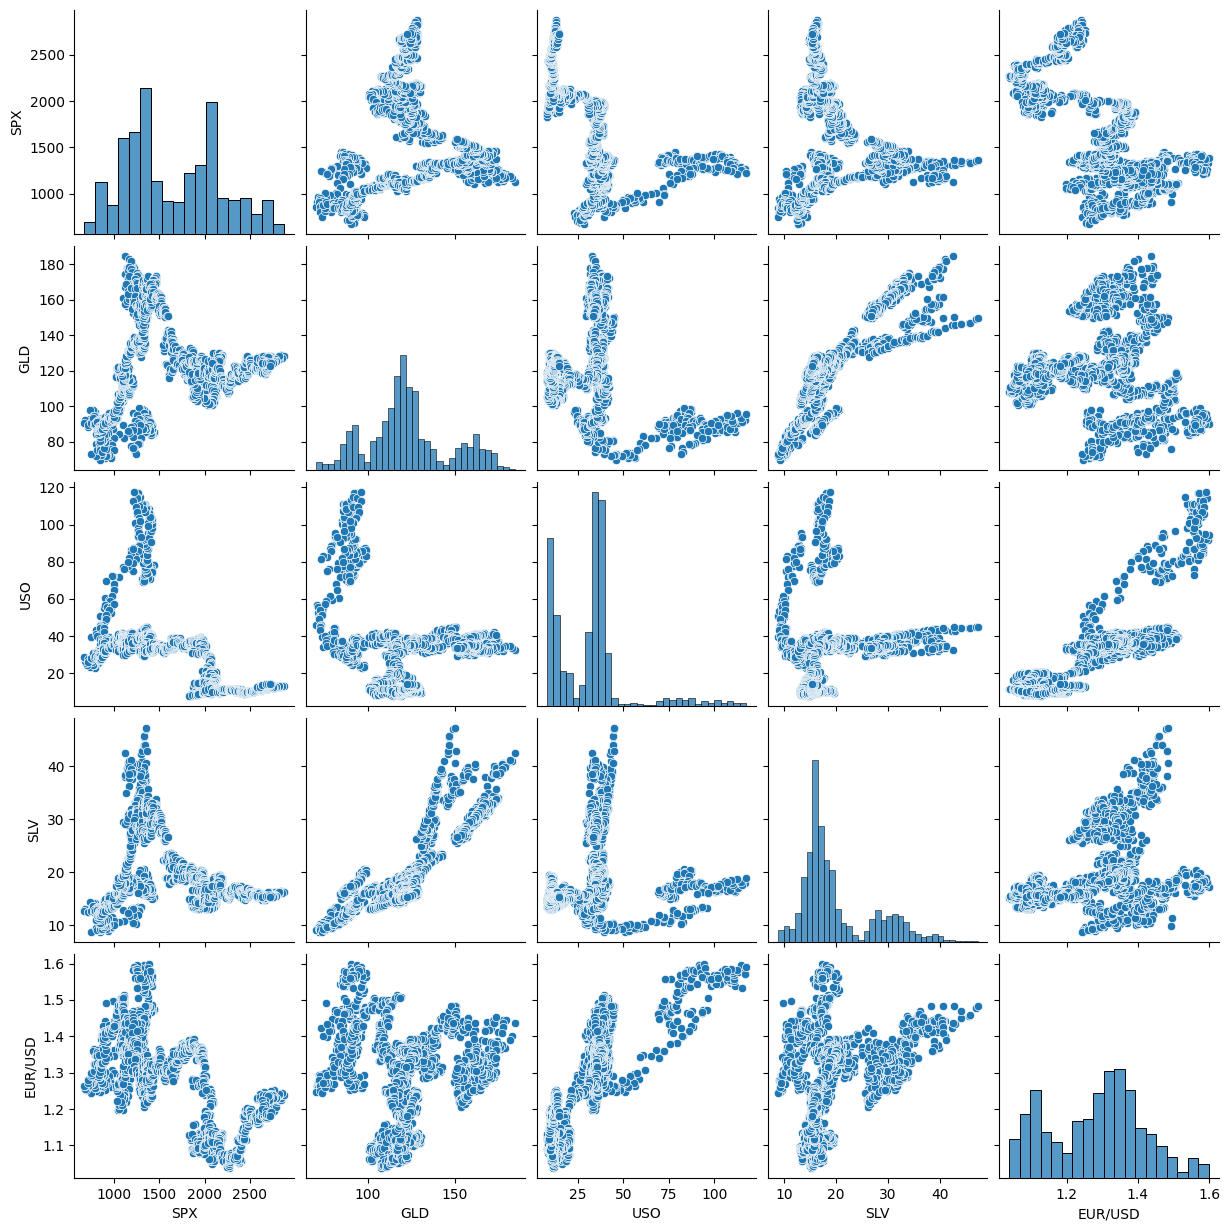

In [ ]:
sns.pairplot(df.loc[:,df.dtypes == 'float64'])
plt.show()

In [ ]:
#Preparing a copy to work with
df["new"]=df["SLV"]*5
df.head()
df1 = df.copy()
temp = df1[['SPX','USO','SLV','EUR/USD','new']]
x = temp.iloc[:, :].values
y = df1.iloc[:, 2].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 6.112232362040013
Mean Squared Error: 75.61760337571607
Root Mean Squared Error: 8.695838279068676
R-squared: 0.853012546687373


In [ ]:
#Checking the training and test set accuracy
y_pred = regressor.predict(x_test)
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.8877758904855643
Testing Accuracy:  0.853012546687373


# Using XGBoost

In [ ]:
from xgboost import XGBRegressor  # Import XGBoost (eXtreme Gradient Boosting)
xgboost_regressor = XGBRegressor(random_state=0)
xgboost_regressor.fit(x_train, y_train)

# Checking the training and test set accuracy for XGBoost
accuracy_train_xgb = xgboost_regressor.score(x_train, y_train)
accuracy_test_xgb = xgboost_regressor.score(x_test, y_test)
print("XGBoost Training Accuracy: ", accuracy_train_xgb)
print("XGBoost Testing Accuracy: ", accuracy_test_xgb)


XGBoost Training Accuracy:  0.9996650396117998
XGBoost Testing Accuracy:  0.991710111500158


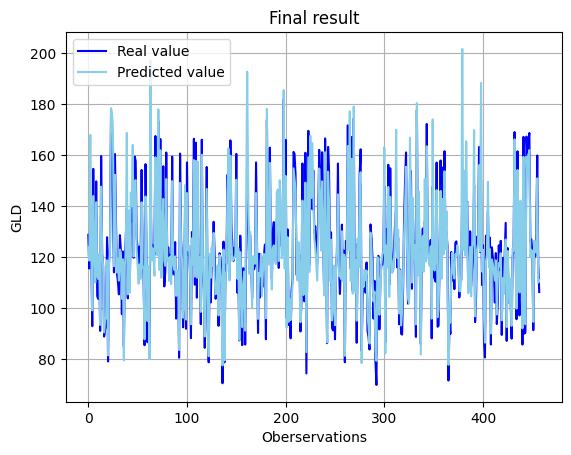

In [ ]:
#Visualising the overall result of the model
plt.plot(y_test, color = 'blue', label = 'Real value')
plt.plot(y_pred, color = 'skyblue', label = 'Predicted value')
plt.grid(True)
plt.title('Final result')
plt.xlabel('Oberservations')
plt.ylabel('GLD')
plt.legend()
plt.show()

# **RANDOM FOREST**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [ ]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataframe
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
df.shape

(2290, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the number of missing values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
#checking for null values
df.isnull().mean()

Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64

In [ ]:
# getting the statistical measures of the data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<Axes: >

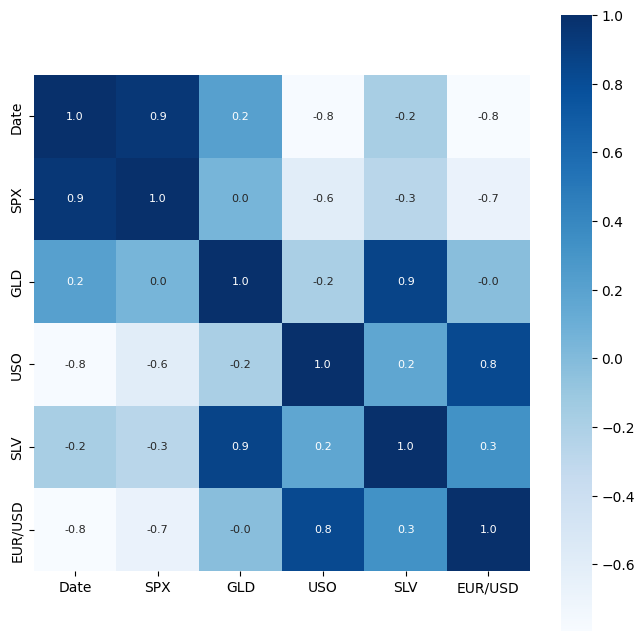

In [ ]:
# Load the data into a DataFrame
df = pd.read_csv('gld_price_data.csv')

# Convert the 'Date' column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the correlation matrix
correlation = df.corr()

# Generate the heatmap
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
# correlation values of GLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


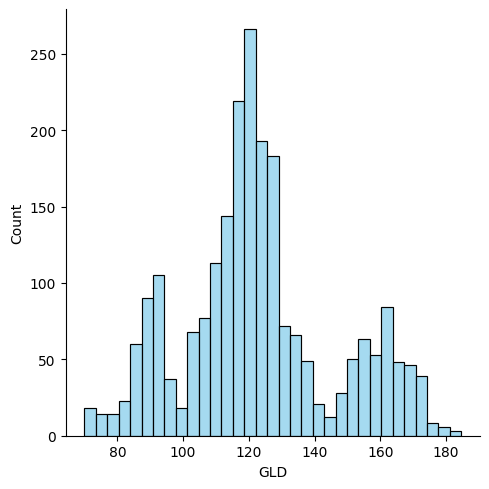

In [ ]:
gold_data=df.drop(columns='Date',axis=1)
# Check if the variable is defined
# if 'gld_price_data' not in globals():
#     # Assign the DataFrame to the variable
#     gld_price_data = df
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='skyBlue')


# Spliting the data into Test and Train data

In [ ]:
## gold price value
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
scaler=StandardScaler()
#standardizing the data
X=scaler.fit_transform(X)

In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
## model trinning with our random forest regression
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
y_pred_rf = regressor.predict(X_test)

# Calculate evaluation metrics for Random Forest
mae_rf = mean_absolute_error(Y_test, y_pred_rf)
mse_rf = mean_squared_error(Y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(Y_test, y_pred_rf)

# Print the evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) Score:", r2_rf)

Random Forest Evaluation Metrics:
Mean Absolute Error (MAE): 1.3253108862882086
Mean Squared Error (MSE): 5.715705034137625
Root Mean Squared Error (RMSE): 2.390754072282974
R-squared (R2) Score: 0.9891633795334385


In [ ]:
print(test_data_prediction)

[168.64499971  81.99769978 116.02550017 127.74670085 120.83470106
 154.73619765 150.33399823 126.0342     117.55379872 126.1028004
 116.71650137 171.87160077 141.53779822 167.79929826 115.08810023
 117.71380064 138.69940322 170.3827014  159.00860241 158.3633005
 155.25220037 125.29569978 175.23379998 157.25740343 125.24250056
  93.67419984  77.14980018 120.55140021 119.12579955 167.53879943
  88.09660051 125.47650042  91.1113007  117.70460019 121.10389943
 136.29410051 115.61760106 115.22890066 146.04399979 107.30000083
 104.49530247  87.20429781 126.3815008  118.21880005 153.90589887
 119.51479975 108.2854001  107.93159803  93.20200052 127.12769782
  74.86960045 113.68299941 121.67659993 111.35419923 118.82559886
 120.55169914 160.60999962 169.59850085 146.95089641  85.68099834
  94.2577007   86.87919839  90.67240023 118.9784008  126.41780079
 127.4965998  170.70690114 122.28099946 117.52869882  98.3812004
 167.46599972 143.21479895 132.41400266 121.02150238 121.58739944
 119.49120041

In [ ]:
# R squared error ---- evaluation procees
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9891633795334385


In [ ]:
## if i not convert into a list then it is showing error
Y_test = list(Y_test)

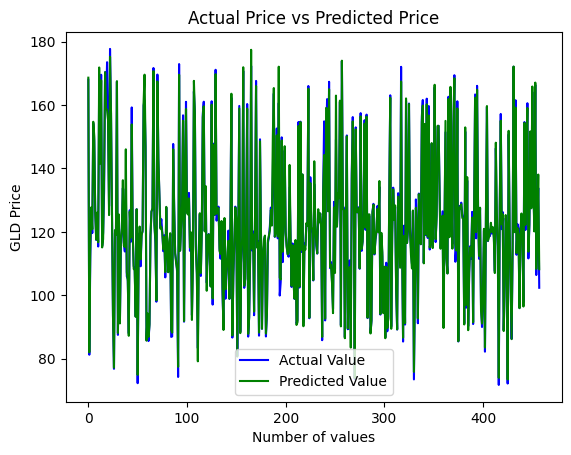

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# **Desion Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('gld_price_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# Feature engineering
df["new"] = df["SLV"] * 5

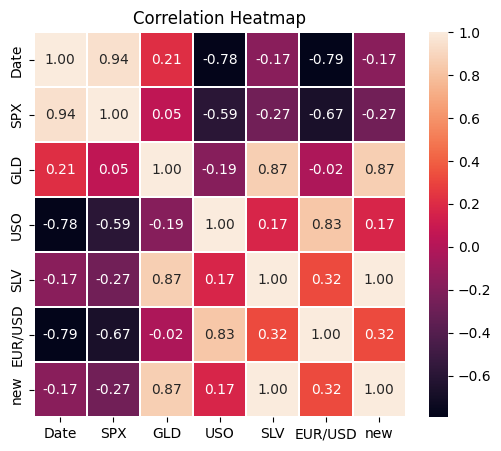

In [ ]:
# Visualize correlation heatmap
corr = df.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidths=0.30)
plt.title('Correlation Heatmap')
plt.show()

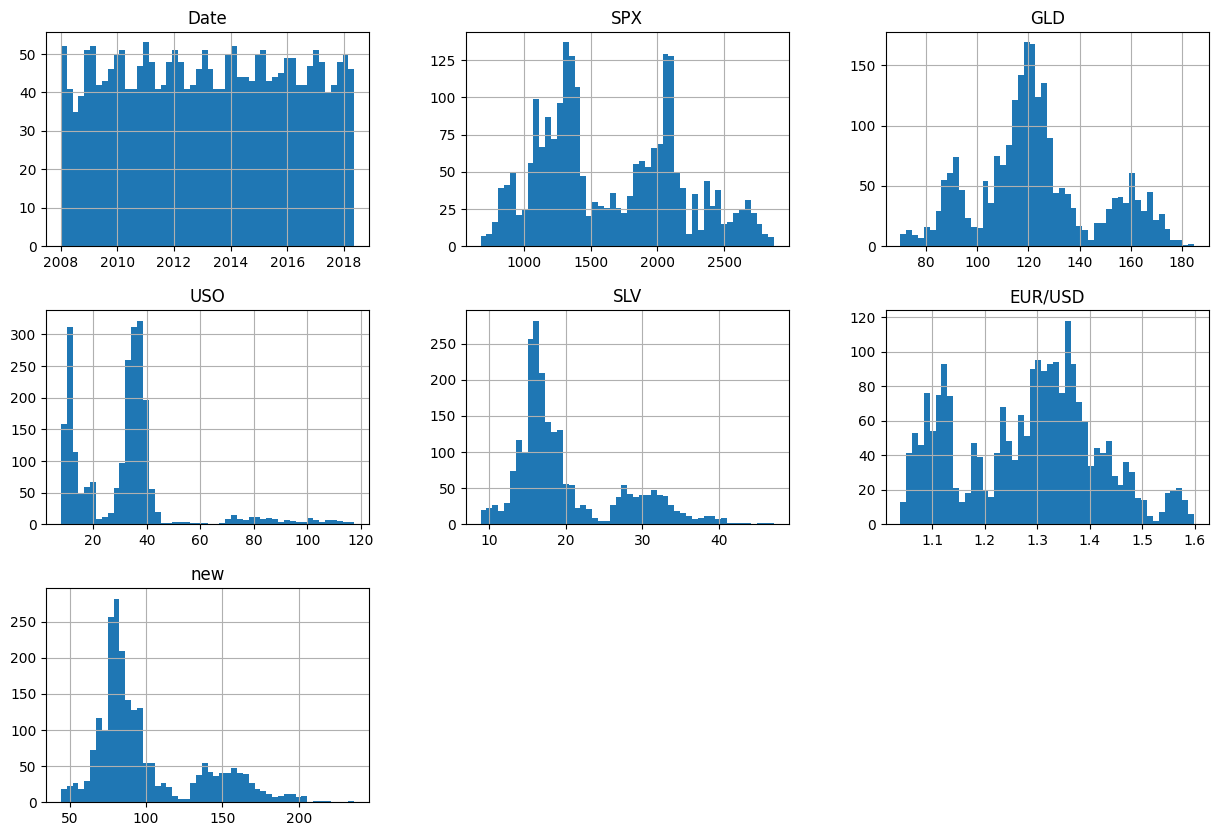

In [ ]:
# Visualize histograms
df.hist(bins=50, figsize=(15,10))
plt.show()


In [ ]:
# Define features and target variable
X = df[['SPX', 'USO', 'SLV', 'EUR/USD', 'new']]
y = df['GLD']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Fitting Decision Tree Regression to the dataset
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Model evaluation
accuracy_train = regressor.score(X_train, y_train)
accuracy_test = regressor.score(X_test, y_test)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Model evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Decision Tree Regression Evaluation Metrics:")

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Decision Tree Regression Evaluation Metrics:
Mean Absolute Error (MAE): 1.4072490152838422
Mean Squared Error (MSE): 6.830592244080437
Root Mean Squared Error (RMSE): 2.6135401745679054
R-squared (R2) Score: 0.986722518120737


In [ ]:
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)
print("R-squared:", r2)

Training Accuracy: 1.0
Testing Accuracy: 0.986722518120737
R-squared: 0.986722518120737


In [ ]:
# # Drop the 'new' column before generating the correlation heatmap
# df_for_heatmap = df.drop(columns=['new'])

# # Visualize correlation heatmap without the 'new' column
# corr = df_for_heatmap.corr()
# plt.figure(figsize=(6,5))
# sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True, fmt='.2f', linewidths=0.30)
# plt.title('Correlation Heatmap (Excluding "new" Column)')
# plt.show()

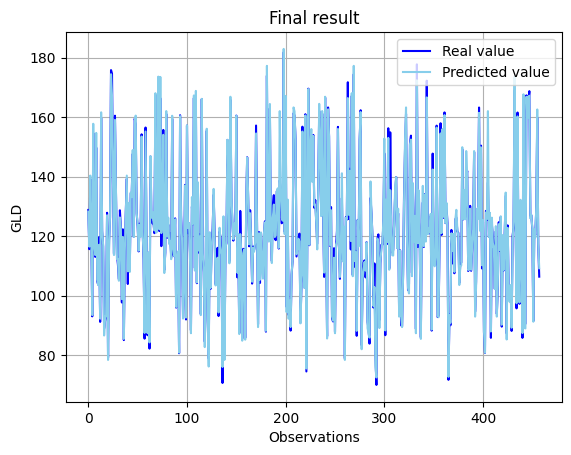

In [ ]:
# Visualizing the overall result of the model
plt.plot(y_test.values, color='blue', label='Real value')
plt.plot(y_pred, color='skyblue', label='Predicted value')
plt.grid(True)
plt.title('Final result')
plt.xlabel('Observations')
plt.ylabel('GLD')
plt.legend()
plt.show()